# konlpy 모듈 테스트

In [11]:
import MeCab
m = MeCab.Tagger()
print(m.parse('안녕하세요. 달콩이 예비맘입니다.'))

안녕	NNG,행위,T,안녕,*,*,*,*
하	XSV,*,F,하,*,*,*,*
세요	EP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*
.	SF,*,*,*,*,*,*,*
달	NNG,*,T,달,*,*,*,*
콩	NNG,*,T,콩,*,*,*,*
이	JKS,*,F,이,*,*,*,*
예비	NNG,행위,F,예비,*,*,*,*
맘	NNG,*,T,맘,*,*,*,*
입니다	VCP+EF,*,F,입니다,Inflect,VCP,EF,이/VCP/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [12]:
from konlpy.tag import Mecab
mecab_tokenizer = Mecab(dicpath='c:/mecab/mecab-ko-dic/').morphs
print(mecab_tokenizer('안녕하세요. 테스형입니다.'))

['안녕', '하', '세요', '.', '테스', '형', '입니다', '.']


In [13]:
import pandas as pd
train_df = pd.read_csv('./데이터셋/ratings_train.txt', sep='\t')
display(train_df.head())
print(train_df.shape)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


(150000, 3)


In [14]:
test_df = pd.read_csv('./데이터셋/ratings_test.txt', sep='\t',encoding='utf-8')
display(train_df.head())
print(train_df.shape)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


(150000, 3)


# 학습 데이터의 긍정/ 부정 비율 확인

In [15]:
print(train_df['label'].value_counts())

label
0    75173
1    74827
Name: count, dtype: int64


# 결측치 확인

In [16]:
print(train_df.isna().sum())

id          0
document    5
label       0
dtype: int64


# 평가 데이터의 긍정/ 부정 비율 확인

In [17]:
print(test_df['label'].value_counts())

label
1    25173
0    24827
Name: count, dtype: int64


# 데이터 전처리

## 결측치 처리

In [18]:
train_df.dropna(inplace=True)
test_df.dropna(inplace = True)

## id 컬럼 삭제

In [19]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

# konlpy, Mecab을 이용한 단어 토큰화

In [20]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath='c:/mecab/mecab-ko-dic/')
tokens = [ mecab.morphs(text) for text in train_df['document']]
tokens = list(map(lambda x: ' '.join(x), tokens))
print(tokens[:5])

['아 더 빙 . . 진짜 짜증 나 네요 목소리', '흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나', '너무 재 밓었다그래서보는것을추천한다', '교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정', '사이몬페그 의 익살 스런 연기 가 돋보였 던 영화 ! 스파이더맨 에서 늙 어 보이 기 만 했 던 커스틴 던스트 가 너무나 도 이뻐 보였 다']


# KNU 한글 감성어 사전 로딩

In [21]:
import json
import pandas as pd
with open('./데이터셋/SentiWord_info.json', encoding='utf-8', mode = 'r') as f:
    sentiWor_info = json.load(f)
sentiWor_df = pd.DataFrame(sentiWor_info)
print(sentiWor_df.shape)
print(sentiWor_df.sample(5))
print(sentiWor_df.info())

(14843, 3)
           word word_root polarity
2808     다독다독하다        다독        1
3686    마음을 졸이다     마음 졸이       -1
9901   우그러지게 하다   우그러지 하다       -1
6904      생기 있는      생기 있        1
12905    크게 감동이      크 감동        2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       14843 non-null  object
 1   word_root  14843 non-null  object
 2   polarity   14843 non-null  object
dtypes: object(3)
memory usage: 348.0+ KB
None


In [23]:
sentiWor_df['polarity'] = sentiWor_df['polarity'].astype(int)

In [24]:
print('감성 지수 최대값: ', sentiWor_df['polarity'].max())
print('감성 지수 최소값: ', sentiWor_df['polarity'].min())
print('감성 지수 평균값: ', sentiWor_df['polarity'].mean())

감성 지수 최대값:  2
감성 지수 최소값:  -2
감성 지수 평균값:  -0.48258438321094116


In [25]:
print(sentiWor_df['polarity'].value_counts())

polarity
-1    5029
-2    4797
 2    2597
 1    2266
 0     154
Name: count, dtype: int64


# 토큰화된 문장과 감성사전 비교를 통한 감성지수 산출

In [1]:
sentiment_score = pd.DataFrame(columns=['review', 'sentiment_score'])

NameError: name 'pd' is not defined

In [ ]:
idx = 0
for review in tokens : 
    senti_score = 0
    for i in range(len(sentiWor_df)) :
        if sentiWor_df['word'][i] in review: 
            senti_score += sentiWor_df['polarity'][i]
    sentiment_score.loc[idx] = [review, senti_score]
    idx += 1

# 리뷰 감성 값 DataFrame 저장

In [27]:
import joblib
joblib.dump(sentiment_score, './sentiment_score.pkl')

['./sentiment_score.pkl']

In [28]:
import joblib
senti_score = joblib.load('./데이터셋/sentiment_score.pkl')
display(senti_score.head())
print(senti_score.shape)

,review,sentiment_score
0,아 더 빙 . . 진짜 짜증 나 네요 목소리,-2
1,흠 . .. 포스터 보고 초딩 영화 줄 . ... 오버 연기 조차 가볍 지 않 구나,-2
2,너무 재 밓었다그래서보는것을추천한다,-1
3,교도소 이야기 구먼 . . 솔직히 재미 는 없 다 . . 평점 조정,3
4,사이몬페그 의 익살 스런 연기 가 돋보였 던 영화 ! 스파이더맨 에서 늙 어 보이 ...,-2


(149995, 2)


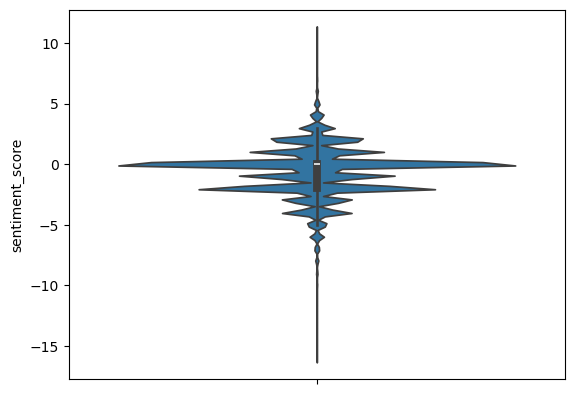

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=senti_score, y='sentiment_score')
plt.show()

# 감성 값 긍/부정 레이블 값으로 치환
- 감성 값이 임계치 이상인 경우는 긍정으로, 미만인 경우는 부정의 값을 갖는 label값으로 치환

In [30]:
senti_score['label'] = senti_score['sentiment_score'].map(lambda x: 1 if x >= 0 else 0)

In [7]:
print(senti_score['label'].value_counts())

label
1    84501
0    65494
Name: count, dtype: int64


# 모델 성능 평가

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_target = train_df['label']
y_hat = senti_score['label']
cm = confusion_matrix(y_target,y_hat)
print(cm)
print(f'정확도:{accuracy_score(y_target, y_hat):.3f}')

[[38589 36581]
 [26905 47920]]
정확도:0.577


- 추가분석사항
한글을 제외한 다른 문자 제거 -> 제거 결과 아무런 값도 남지 않은 레코드 확인 후 삭제
- 불용어 제거 : 한글 불용어 사전은 별도로 구성 필요